# < 간단한 몇 가지 >

## → array, list, dictionary로 바꾸기

In [1]:
import pydataset
mpg = pydataset.data('mpg')

df = mpg.iloc[:5, 2:5]
df

,displ,year,cyl
1,1.8,1999,4
2,1.8,1999,4
3,2.0,2008,4
4,2.0,2008,4
5,2.8,1999,6


In [2]:
#1. df를 array로 바꾸기
df.values

array([[1.800e+00, 1.999e+03, 4.000e+00],
       [1.800e+00, 1.999e+03, 4.000e+00],
       [2.000e+00, 2.008e+03, 4.000e+00],
       [2.000e+00, 2.008e+03, 4.000e+00],
       [2.800e+00, 1.999e+03, 6.000e+00]])

In [3]:
#2. df를 딕셔너리로 바꾸기
df.to_dict()

{'displ': {1: 1.8, 2: 1.8, 3: 2.0, 4: 2.0, 5: 2.8},
 'year': {1: 1999, 2: 1999, 3: 2008, 4: 2008, 5: 1999},
 'cyl': {1: 4, 2: 4, 3: 4, 4: 4, 5: 6}}

In [4]:
#3. df를 리스트로 바꾸기
df.values.tolist() #리스트로 바꾸려면 데이터프레임일때는 X

[[1.8, 1999.0, 4.0],
 [1.8, 1999.0, 4.0],
 [2.0, 2008.0, 4.0],
 [2.0, 2008.0, 4.0],
 [2.8, 1999.0, 6.0]]

## → 리스트를 가로 방향으로 한 줄 세우기

In [5]:
#df를 하나의 리스트로 만들기(가로로 줄 세우기)
li = []
for i in df.values.tolist():    #정석 방식
    for j in i:
        li.append(j)
li

[1.8,
 1999.0,
 4.0,
 1.8,
 1999.0,
 4.0,
 2.0,
 2008.0,
 4.0,
 2.0,
 2008.0,
 4.0,
 2.8,
 1999.0,
 6.0]

In [6]:
df.values.reshape(-1).tolist()   #같은방법

[1.8,
 1999.0,
 4.0,
 1.8,
 1999.0,
 4.0,
 2.0,
 2008.0,
 4.0,
 2.0,
 2008.0,
 4.0,
 2.8,
 1999.0,
 6.0]

In [7]:
df.values.flatten().tolist() #flatten() '평평하게 편다'

[1.8,
 1999.0,
 4.0,
 1.8,
 1999.0,
 4.0,
 2.0,
 2008.0,
 4.0,
 2.0,
 2008.0,
 4.0,
 2.8,
 1999.0,
 6.0]

## → map 이용하여 딕셔너리 이름 할당하기

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

iris_data = iris['data']
iris_label = iris['target']

#데이터 프레임으로 변환하기
iris_df = pd.DataFrame(data = iris_data, columns=iris['feature_names'])

#새로운 칼럼 만들기.(label)
iris_df['label'] = iris['target']

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
#map을 사용하여 딕셔너리로 이름 할당하기.
iris_df['label'] = iris_df['label'].map({0:'setosa', 1:'versicolior', 2:'virginica'})
iris_df
# iris_df['label'].map(label_mapping)도 같은 방식

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## → array상태로 빈도수 세기

In [4]:
from sklearn.datasets import load_wine 

wine = load_wine()

features = X = wine['data']
labels = y = wine['target']

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score
cross_val_score(dt_clf, features, labels, cv=4, scoring='accuracy')

labels  #위에는 labels 데이터를 만들기 위함임. 상관X

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
#가공 없이 바로 빈도수 세주기.(이 단어가 몇 번 나왔지?)
import collections, numpy

collections.Counter(labels)

Counter({0: 59, 1: 71, 2: 48})

In [6]:
#한번 가공해서 빈도수 세기
pd.Series(labels).value_counts()

1    71
0    59
2    48
dtype: int64

# < 사이킷런 >

In [8]:
import sklearn

## □ 붓꽃 품종 예측하기 

### 1. 데이터 세트 분리 : train_test_split( )
: 데이터를 학습 데이터와 테스트 데이터로 분리합니다.

In [35]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  #분리

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
type(iris) 
#Bunch라고 출력되지만 사실은 딕셔너리와 같은것

sklearn.utils.Bunch

In [ ]:
iris.keys()
iris.values()
iris.items() #key와 values를 동시에 보여준다.

In [15]:
iris_data = iris['data']
iris_data  #딕셔너리에서 특정 값을 찾는 것과 같은 방식

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
iris_label = iris['target']
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label)
# _train은 학습용 데이터, _test은 테스트용 데이터를 나타낸다.
# iris_data -> X값   iris_label -> y값

NameError: name 'train_test_split' is not defined

In [21]:
X_train.shape

(112, 4)

데이터의 갯수는 112개라는 이야기.

칼럼.특질.피쳐는 4개이다.

#### → 주요 Key의 의미

```
- data : X(피처)의 데이터 세트

- target : 최종적으로 구하려는 결괏값
           (분류 시에는 레이블 값, 회귀 시에는 숫자 결괏값 데이터 세트로 나타난다.)

- target_names : 개별 y(레이블)의 이름, 분류하고자 하는 대상

- feature_names : 피처의 이름

- DESCR : describe의 약자로 데이터에 대한 설명
```

#### → train_test_split() Parameter

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

```
- arrays : 분할시킬 데이터를 입력

- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

- shuffle : 셔플여부설정 (default = True)

- stratify : 지정한 Data의 비율을 유지한다. 
             예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
             stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채                분할된다.
```

### 2. 모델 학습
: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킵니다.

#### 1) DecisionTreeClassifier( ) 
: 객체 생성

In [36]:
dt_clf = DecisionTreeClassifier()
# DecisionTreeClassifier 객체 생성(아직 아무런 기능 없다.)

#### 2) fit( )

In [20]:
dt_clf.fit(X_train, y_train)
#fitting 적합한다. 학습한다. 훈련한다.

DecisionTreeClassifier()

DecisionTreeClassifier 객체는 학습 데이터를 기반으로 학습이 완료됌.

이제 이 객체의 predict()에 테스트 데이터를 이용하여 예측값을 반환함.

In [32]:
X_test.shape  #38개가 있다.

(38, 4)

### 3. 예측 수행 : predict( )
: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측합니다.

In [23]:
y_pred = dt_clf.predict(X_test)
y_pred  #예측

array([2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1,
       1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1])

In [24]:
y_test  #정답

array([1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1])

In [33]:
y_pred == y_test  # 둘 간 얼마나 일치한가?

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [34]:
sum(y_pred == y_test) #일치 갯수는 36개, 처음에는 38개였다.

36

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

위에 y_test 출력값을 보면 1,0 이런식으로 되어있는데

이 숫자가 의미하는 바는 위에 어레이의 인덱스를 표현한 것이다.

### 4. 평가 : accuracy_score( )
: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다.

In [30]:
from sklearn.metrics import accuracy_score  #정확도를 보여준다.

In [31]:
accuracy_score(y_test, y_pred)

0.9473684210526315

# < 데이터 전처리 >
```
< 이유 >

- 결손값, 즉 NaN, Null 값은 허용되지 않습니다. (이러한 경우 pandas로 처리)
- 문자열 값을 입력값으로 허용하지 않습니다. (그래서 0,1 이런식으로 표현함.)

```

## □ 레이블 인코딩: LabelEncoder
- LabelEncoder를 객체로 생성 후 fit()과 transform()을 호출해 인코딩

In [39]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [40]:
labels = encoder.fit_transform(['TV', '냉장고', '전자레인지'])
labels

array([0, 1, 2], dtype=int64)

## □ 원-핫 인코딩
One-Hot Encoding / '한 개만 불이 들어와요'

### 1) 데이터 불러오기

In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
items

['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

### 2) 2차원 데이터로 변환

In [10]:
items = np.array(items).reshape(-1,1)
# 한줄로 쭉 서있는게 아니라 세로로 한줄로 들어가야한다.(열이 1개)
items

array([['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U5')

### 3) OneHotEncoder 클래스로 변환

In [11]:
encoder = OneHotEncoder()
one_hot_labels = encoder.fit_transform(items)
one_hot_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

Sparse -> 희소행렬

### 4) toarray( )
:희소행렬 형태를 밀집행렬로 변환하기

In [12]:
one_hot_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

### ▶ 또 다른 방법 : get_dummies( )
: array로 바꿀 필요 없이 API 사용하면 간단하다.

In [13]:
items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
pd.get_dummies(items)

,TV,냉장고,믹서,선풍기,전자레인지,컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# < 교차검증 >
- Cross Validation
- 크로스는 여러번 이라는 뜻
- 교차검증은 여러번 검증한다는 것(여러 경로는 통해서 검증)

## ▶ KFlod(n_splits = )

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()                   # 파일부르기

iris_data = iris.data                # data(정보)와 target(매치대상) 저장
iris_label= iris.target

dt_clf=DecisionTreeClassifier()      # 의사결정 트리 

kfold = KFold(n_splits = 5)          # 5번 검증한다

In [15]:
cv_accuracy = []
n_iter = 0

for train_index, test_index in kfold.split(iris_data):
    print(train_index, test_index)
    print("---"*10)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
------------------------------
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 12

```
2개중 첫번째 인덱스는 4개에 대한 인덱스(train_data)
뒤에는 나머지 한개의 인덱스(test_data)
이렇게 1덩어리가 5개로 쪼개져있다.
----------------------------------------
0,1,2가 있는데 0,1은 50개씩 있는데 2가 5개밖에 없으면 train이나 test에 편중되어서
2가 없는 상태로 학습이 되어서 맞추지 못하는 상황이 생긴다.

즉, 비율을 맞춰야 한다.

0이 100개 1은 40개 2가 10로 편중된 데이터가 있다면 
100,40,10개 각각 7:3비율로 7은 train으로 3은 test로 골고루 분산되게끔 만들어야한다.

test_size = 0.3
```

In [20]:
iris_data = iris.data
                # data(정보)와 target(매치대상) 저장
iris_label= iris.target


dt_clf = DecisionTreeClassifier()      # 의사결정 트리 
kfold = KFold(n_splits=5)

cv_accuracy = []

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 인덱스를 반환한다. 이거 중요함.  
for train_index, test_index  in kfold.split(iris_data): 
    
    # print(train_index, test_index)
    # print("---"*10)
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = iris_data[train_index], iris_data[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]

    
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    
   
    accuracy = accuracy_score(y_test,pred)   
    cv_accuracy.append(accuracy)
 
    print("개별 검증 정확도: ", cv_accuracy)
    
print('평균 검증 정확도:', np.mean(cv_accuracy))

개별 검증 정확도:  [1.0]
개별 검증 정확도:  [1.0, 1.0]
개별 검증 정확도:  [1.0, 1.0, 0.8333333333333334]
개별 검증 정확도:  [1.0, 1.0, 0.8333333333333334, 0.9333333333333333]
개별 검증 정확도:  [1.0, 1.0, 0.8333333333333334, 0.9333333333333333, 0.7666666666666667]
평균 검증 정확도: 0.9066666666666666


p102, 103 줄인 모습

```
<< 여기서 split가 중요한 이유 >>

- split는 입력값이 데이터프레임이 들어간다.
- 그럼 출력값은 똑같이 데이터프레임인가? 아니다. 데이터프레임 인덱스를 출력하게 된다.
- 해당 인덱스를 넣으면 거기에 해당하는 값이 출력하게 되는데 
  그 원리를 이용한게 저 부분이다.
```

### → StratifiedKFold : 제대로 분배X일때

In [17]:
from sklearn.datasets import load_iris #데이터 불러오기
from sklearn.tree import DecisionTreeClassifier  #정해주기
from sklearn.metrics import accuracy_score #평가기준
from sklearn.model_selection import StratifiedKFold #층화된 kfold를 가져온다.

iris = load_iris()
features = X = iris_data = iris.data
labels = y = iris_label = iris.target

dt_clf = DecisionTreeClassifier()

s_kfold = StratifiedKFold(n_splits = 3)
cv_accuracy = []

for train_index, test_index in s_kfold.split(features, labels): #비율 다 감안해서 쪼갠것
    print(train_index)
    print(test_index)
    print()

[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 133 134 135 136 137 138 139
 140 141 142 143 144 14

In [18]:
from sklearn.datasets import load_iris #데이터 불러오기
from sklearn.tree import DecisionTreeClassifier  #정해주기
from sklearn.metrics import accuracy_score #평가기준
from sklearn.model_selection import StratifiedKFold #층화된 kfold를 가져온다.

iris = load_iris()
features = X = iris_data = iris.data
labels = y = iris_label = iris.target

dt_clf = DecisionTreeClassifier()

s_kfold = StratifiedKFold(n_splits = 3)
cv_accuracy = []

for train_index, test_index in s_kfold.split(features, labels):

    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    acc = accuracy_score(y_test, pred)  #이 두 개를 비교해서 정확도 보가
    cv_accuracy.append(acc)
    print("개별 정확도: ", acc)
    
print('정확도 모음: ', cv_accuracy)

개별 정확도:  0.98
개별 정확도:  0.94
개별 정확도:  0.96
정확도 모음:  [0.98, 0.94, 0.96]


In [19]:
np.mean(cv_accuracy).round(4)

0.96

## ▶★ cross_val_score( ) : 이거 하나면 끝

In [21]:
from sklearn.model_selection import cross_val_score, cross_validate #교차검증 점수

iris = load_iris()
data = features = X = iris_data = iris.data
label = labels = y = iris_label = iris.target

dt_clf = DecisionTreeClassifier()

In [22]:
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3) #3번 쪼개기
scores

array([0.98, 0.92, 0.96])

In [23]:
np.mean(scores).round(4)

0.9533

# < GridSearchCV : 최적 추출 >
: 최적 하이퍼 파라미터 추출하기

## 0) 기능
- refit = True은 최적의 하이퍼 파라미터를 찾아 재학습한다.

## 1) max_depth, min_samples_split

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

In [5]:
iris_data = iris.data
iris_label= iris.target

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, 
                                                    random_state=121) 

dt_clf = DecisionTreeClassifier()

grid_parameters = {'max_depth':[1,2,3],
                  'min_samples_split': [2,3]}

grid_tree = GridSearchCV(dt_clf, param_grid=grid_parameters, cv=3, refit=True)

grid_tree.fit(X_train, y_train) #학습이 이루어짐

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

### → cv_results_

```
cv_results_는 GridSearchcv의 결과 세트로서 딕셔너리 형태로 key값과 리스트 형태인 value값을 가진다.

cv_results_는 데이터프레임으로 변환해야 보기 편하다.
```

In [7]:
import pandas as pd

pd.DataFrame(grid_tree.cv_results_).iloc[:,5:] 
#보기 좋게 데이터프레임으로 변경함

,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


## 2) best_params_, grid_tree.best_score_
: 최적 파라미터, 최고 정확도

In [8]:
grid_tree.best_params_

{'max_depth': 3, 'min_samples_split': 2}


grid_parameters = {'max_depth':[1,2,3], 'min_samples_split': [2,3]} 에서 

격자로 곱해줘서 가장 좋은걸 찾아줌

In [10]:
grid_tree.best_score_

0.975

In [11]:
pred = grid_tree.predict(X_test)
pred

array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 2, 2])

In [12]:
accuracy_score(y_test, pred)

0.9666666666666667

# < 피처 스케일링 >
- feature scaling
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 대표적인 방법으로 1) 표준화 2) 정규화가 있다.

## → 표준화(Standardization)
: 이상치(극단적으로 크거나 작은값)에 영향을 적게 받습니다.

In [16]:
iris = iris['data']
iris_df = pd.DataFrame(iris)
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
# standardize( )으로 함수 만들기
def standardize(x):
    return (x - x.mean()) / x.std()

In [18]:
iris_df.apply(standardize).mean()  

0   -1.457168e-15
1   -1.638319e-15
2   -1.292300e-15
3   -5.543714e-16
dtype: float64

평균이 0이 나오면 잘 나온것 

e-16 이런식으로 나오면 0으로 나온것임.

### ▶ StandardScaler() : 한 번에 표준화

In [19]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### ▶ MinMaxScaler() : 데이터값을 0,1로 변환

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [30]:
 #이렇게 써줘도 결과는 똑같다.
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

#### → 정규화 만들기

In [2]:
#from sklearn.preprocessing import MinMaxScaler
#을 이용하여 정규화 시켜주세요.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris = iris['data']
iris_df = pd.DataFrame(iris) 

iris_df.apply(lambda x:x-x.min()/(x.max()-x.min()))

,0,1,2,3
0,3.905556,2.666667,1.230508,0.158333
1,3.705556,2.166667,1.230508,0.158333
2,3.505556,2.366667,1.130508,0.158333
3,3.405556,2.266667,1.330508,0.158333
4,3.805556,2.766667,1.230508,0.158333
...,...,...,...,...
145,5.505556,2.166667,5.030508,2.258333
146,5.105556,1.666667,4.830508,1.858333
147,5.305556,2.166667,5.030508,1.958333
148,5.005556,2.566667,5.230508,2.258333


#### < 주의 : fit >

X_train, X_test = train_test_split(iris_data)

X_train

scaler.fit()
scaler.fit_transform(X_train)

1,2,1,2 ---> 10

X_test

scaler.transform(x_test)
1,2,1,2 ----> 10? X

먼저 있는것을 정규화 시키고 쪼개라 

쪼개놓고 각각 정규화 시키면 위의 fit기준과 아래의 fit기준이 달라지게 된다.

즉, fit은 한번만 해줘야한다.

< 올바른 표현 >

scaler.fit(x)
scaler.transformm(x)

## → 정규화(Normalization)
: 데이터의 분포가 가우시안 분포가 아닌(혹은 분포를 알 수 없는) 경우 유용하다.

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()

iris = iris['data']
iris_df = pd.DataFrame(iris)
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
iris_df.max()

0    7.9
1    4.4
2    6.9
3    2.5
dtype: float64

In [34]:
iris_df.min()

0    4.3
1    2.0
2    1.0
3    0.1
dtype: float64

In [35]:
def min_max(x):
    return (x - x.min()) / (x.max() - x.min())

In [36]:
iris_df.apply(min_max)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [37]:
iris_df.apply(min_max).max()

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64

In [38]:
#람다식을 이용한 같은 표현
iris_df.apply(lambda x:(x - x.min()) / (x.max() - x.min()))

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


# < 오차 행렬 >

```
                                                             실제 클래스(Actual Class)
                                              
                                              
                                                          Positive                Negative
                                           Positive         TP           |           FP
          예측 클래스(Predict Class)                   
                                           Negative         FN           |           TN

```

```

- TP(Ture Positive) : Positive로 예측했고 True
                      -> 예측값도 Positive 실제값도 Positive

- TN(True Negative) : Negative로 예측했고 True
                      -> 예측값도 Negative 실제값은 Positive

- FP(False Positive) : Positive로 예측했고 False
                       -> 예측값은 Positive이지만 틀렸으므로 실제값은 Negative이다.

- FN(False Negative) : Negative로 예측했고 False
                       -> 예측값은 Negative이지만 틀렸으므로 실제값은 Positive이다.
             
```

# < 정밀도와 재현율 >

```
                                            질병유무
                                    유                  무
                    질병            a          |        b
      검사결과
                    정상            c          |        d
```

```
- 정밀도(Precision) = TP / (TP + FP) = a / a+b
                      -> 질병이 있다고 예측한 것 중 실제 질병이 있는 경우
- 재현율(Recall) = TP / (TP + FN) = a / a+c
                   -> 실제 질병이 있는 경우, 실시한 검사에서 질병이 있다고 판정할 수 있는 능력
                   -> 민감도 또는 TPR 이라고도 불림
- 특이도(Specificity) = TN / (FP + TN) = d / b+d
                        -> 실제 질병이 없는 경우, 실시한 검사에서 질병이 없다고 판정할 수 있는 능력
- 조화평균 : 항목들의 역수에 대한 산술평균을 또 역수로 구한것
            조화평균은 평균적인 변화율을 구할 때 주로 사용된다
```

```
- 트레이드오프(Trade-off) : 정밀도와 재현율 중 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어진다.
- F1 스코어(Score) : 정밀도와 재현율을 결합한 지표로 F1스코어가 높으면 무조건 좋다.
                     정밀도나 재현율이 극단적인 파이를 가질 경우 좋은 평가 지표가 될 수 없기 때문에
                     둘을 결합한 지표가 F1스코어이다.
- ROC 곡선 : 가장좋은 수치는 최대로 위쪽에 달라붙는것. 일반적으로 1에 가까울수록 좋은 수치
- AUC(Area Under Cover) : ROC 곡선의 아래쪽 넓이를 의미한다.
```

혼동행렬 :from sklearn.metrics import confusion_matrix
정확도 : from sklearn.metrics import accuracy_score
정밀도 : from sklearn.metrics import precision_score
재현율 : from sklearn.metrics import recall_score 

Recall과 Precision은 상호보완적관계로 trade off라고 한다.
(한쪽이 높아지면 다른 한쪽은 낮아진다.)

보기에서 틀린 것을 고르세요.

1. Positive 예측값이 많아지면 상대적으로 재현율 값이 높아진다.
2. 임계값이 낮아질수록 Positive로 예측할 확률이 높아진다.
3. '암환자중에 검사로 얼마나 암 환자를 잘 골라냈는가?'는 재현율과 관련이 없다.
4. TP/(TP+FP)은 재현율의 공식이다.
5. ROC 곡선은 X축으로 FPR, Y축으로 TPR를 설정한다.

답은 3번.

보기에서 틀린것을 고르세요.

1. 정밀도와 재현율은 상호 보완적인 평가지표이다.
2. 정밀도를 올리면 재현율이 떨어지는 현상을 트레이드오프라 한다.
3. '정상인중에 얼마나 암환자로 오진했는가?'는 특이도와 관련이 있다.
4. 임곗값을 낮출수록 True 값이 적어진다.
5. ROC곡선 면적에 기반한 AUC값은 1에 가까울수록 좋은 수치이다.

답은 4번.

보기에서 틀린것을 고르세요.

1. 이진 분류 모델에서는 예측 확률이 큰 레이블 값으로 예측한다.
2. 재현율이 중요한 경우는 양성지표를 Negative로 잘못 판단시 큰 영향을 가지는 경우이다.
   : 암환자인 경우에 50:50으로 암일 확률이다. 긴가민가 할때는 암이라고 말 하고 
     큰 병원에 가서 검사를 받는것이 좋은 선택이다.
3. F1 스코어는 정밀도와 재현율을 결합한 지표이다.
4. F1 스코어는 정밀도와 재현율이 큰 차이를 가질수록 높은 값을 가진다.
5. FPR을 0으로 만들려면 임계값을 1로 지정한다.

답은 4번.

보기에서 틀린것을 고르세요,

1. 정밀도가 중요한 경우는 음성데이터를 양성으로 잘못 판단하면 큰 영향이 발생하는 경우이다.
2. TP/(TP+FP)은 정밀도의 공식이다.
3. True Positive Rate은 재현율이다.
4. 전체 환자를 Positive라 예측하고 실제 양성인 환자가 n명이라면 재현율은 0이 된다.
5. 전체 환자 중 1명만 Positive라 예측하고 나머지를 전부 Negative라 예측하면 정밀도는 1이 된다.

답은 4번.

# < 결정트리 >

In [ ]:
의사결정나무는 분류(classification)와 회귀(regression) 모두 가능하다.


지니지수 불순도: 불순도를 측정해주세요.
전체 16개 중 빨간색 10개, 파란색 6개가 있다.
-> 1 - (10/16)^2 - (6/16)^2 = 0.47


불순도를 측정하는 대표적인 방법 2가지
-> 지니지수, 엔트로피지수


불순도가 0.5에서 0.4로 낮아질 때 0.1만큼 (정보 이득 = information gain)이 있다고 말한다.


★ 중요함
min_samples_split: 노드를 분할하기 위한 최소 샘플 갯수(마지막 노드를 말함.)
    
min_samples_leaf: 분할될경우 좌우 브랜치에서 가져야 할 최소 샘플 갯수
    
max_depth: 트리 최대 깊이
    
max_leaf_nodes: 말단 leaf의 총 갯수
    
max_features: 분할에 사용할 feature 갯수


(과적합)은 학습 데이터에 대해 과하게 학습하여 적절한 일반화를 하지 못해서
실제 데이터에 대한 오차가 증가하는 현상으로 이를 방지하기 위해 
의사 결정 트리에서는 가지치기(pruning) 작업을 한다.


싸이킷런 분류 알고리즘에서 predict할 때, 각 label의 확률을 보여주는 매서드는 무엇인가?
predict_proba


GridSearchCV 함수의 파라미터 'n_jobs=-1' 이란 무엇을 의미하는가?
-> 수를 늘릴수록 그만큼 CPU 코어 사용, -1은 전체 사용


결정 트리의 깊이(depth)가 깊을수록 예측 성능이 좋지 않다.


의사결정나무는 스케일이나 평균을 원점에 맞추는 것과 같은 데이터 전처리가 
거의 필요하지 않다.


결정트리에서 지니 계수가 낮을수록 데이터의 균일도가 높음으로 해석한다.


조화평균의 공식은 무엇인가요?
-> 2ab / (a + b)

In [ ]:
< split을 하는 이유 >
training set을 training/validation으로 split을 한 이유는
    -> 모델의 완성도를 좀 더 높이기 위해서이다.(여러번 검증함)
    -> 과적합을 피하기 위해서이다.

# < 앙상블 학습 >

학습 목표: 
머신러닝에서 여러개의 분류기로 데이터를 학습하고 각각 학습된 알고리즘으로 
결과를 예측하고 그 결과들을 결합해 최종으로 더 나은 결과를 도출해내는 방식

In [ ]:
앙상블 기법의 조건
- 각각의 분류기는 상호 독립적이어야 한다.
- 각 분류기의 오분률은 적어도 50% 보다는 낮아야 한다.

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('lr', lr_clf), ('knn', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


## -> 하이퍼 파라미터

In [ ]:
loss = error 오차
loss function : 손실함수
cost function : 비용함수
objective function : 목적함수
learning_rate(eta) : 학습률(에러를 조금씩 수정해 나가는데 얼마만큼 수정할 것인가?)
n_estimators : weak learner를 사용할 것인가(분류기를 몇 개를 동원할 것인가?)
subsample : overfitting을 방지하기 위해서 1보다 작은 값으로 설정 가능. 
            기본값은 1(전체데이터 사용)
early_stopping_rounds : 조기중단(최소 오차지점에서 몇 번 더 검사를 할 것인가)

## -> 앙상블 모델

In [ ]:
1. GBM
   - 경사하강법을 사용
   - 랜덤포레스트 보다 예측성능이 뛰어나지만 시간이 오래 걸린다는 단점
   - GBM보다 실행 속도가 빠른 알고리즘은 XGBoost, LightGBM 이다.
2. 랜덤 포레스트
   - 각자의 데이터 샘플링을 하고 최종적으로 소프트 보팅으로 예측 결정
3. XGBoost
   - XGBoost는 랜덤포레스트보다는 속도가 느리지만 GBM에 비해 학습 속도가 빠르다.
   - XGBoost 에서 과적합 문제를 해결하기 위해 고려해야 할 사항
     a. max_depth 값을 낮춘다. /너무 자세하게 하지 말아라
     b. gamma 값을 높인다. /규제의 수준을 높인다.그렇게 되면 섬세하게 반응하지 않는다.

## -> 앙상블 학습의 유형 : Voting Bagging Boosting

- Voting

In [ ]:
-> 하드 보팅(Hard Voting)

다수결 원칙과 유사
예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정

In [ ]:
-> 소프트 보팅(Soft Voting)

분류기들의 레이블 값 결정 확률을 모두 더해 이를 평균내서 확률이 가장 높은 레이블 값을 
최종 보팅 결과값을 선정

- Bagging

In [ ]:
배깅(Bagging)은 부트스트랩(bootstrap)을 집계(Aggregating)하여 
학습 데이터가 충분하지 않더라도 충분한 학습효과를 주어 높은 bias의 underfitting 문제나, 
높은 variance로 인한 overfitting 문제를 해결하는데 도움을 줌

배깅 방식의 대표는 랜덤 포레스트이다.

In [ ]:
-> Bootstrap

In [ ]:
부트스트랩(bootstrap)은 통계학에서 사용하는 용어로, random sampling을 적용하는 방법

각각의 분류기들이 학습시 상호영향을 주지 않은 상황에서(독립적) 학습이 끝난 다음 결과를 
종합하는 기법

In [ ]:
-> Bootsrapping

In [ ]:
Bootstrapping으로 데이터를 나눌때 한 데이터가 여러번 뽑히거나 
한 데이터가 아예 안 뽑힐 수도 있다.부트스트래핑이란 데이터를 중복을 허용하면서 
샘플링하는 것이다. 

부스팅 방식은 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선해가는 학습 방식이다.

- Voting과 Bagging 차이점

In [ ]:
-> voting: 모든 데이터에 대하여, 서로 다른 알고리즘을 가진 분류기를 결합한 것이다.
-> Bagging: 1개의 알고리즘과 여러 개의 데이터 샘플을 나누어 가진다.

- Boosting

In [ ]:
앙상블 학습 방식 중 맞추기 어려운 문제를 맞추는 것이 목적으로, 에러에 가중치를 주는 방식

# < 랜덤 포레스트 >

In [ ]:
1. 가지를 나눌때마다 p개의 변수중 랜덤하게 m개(p보다 작음)의 변수만 고려한다.
2. 소수의 변수들에 대해 상관성이나 원소가 가진 영향력을 제거할 수 있다.
3. 여러 개의 데이터세트르 분할 할 때, 부트스트래핑(bootstrapping) 분할 방식을 이용하며,
   이는 중첩(복원)을 허용한다.(데이터를 분할할때 부트스트래핑을 사용한다.)

# < LightGBM >

In [ ]:
- 단점
    적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다.

- XGBoost보다 나은 점
    1. 학습시간이 더 빠르다.
    2. 더 적은 메모리를 사용한다.

-lightgbm의 파라미터 max_depth의 default값은 ?
 max_depth값을 따로 지정하지 않을 경우 어떤 의미를 가지는가?
    디폴트 -1. 트리의 깊이에 제한이 없다.

## -> predict_proba

사이킷런 분류 알고리즘에서 각 label데이터의 확률을 보여주는 메서드는 무엇인가?
-> predict_proba

In [6]:
import lightgbm
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

C:\Users\admin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\admin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [7]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9877


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

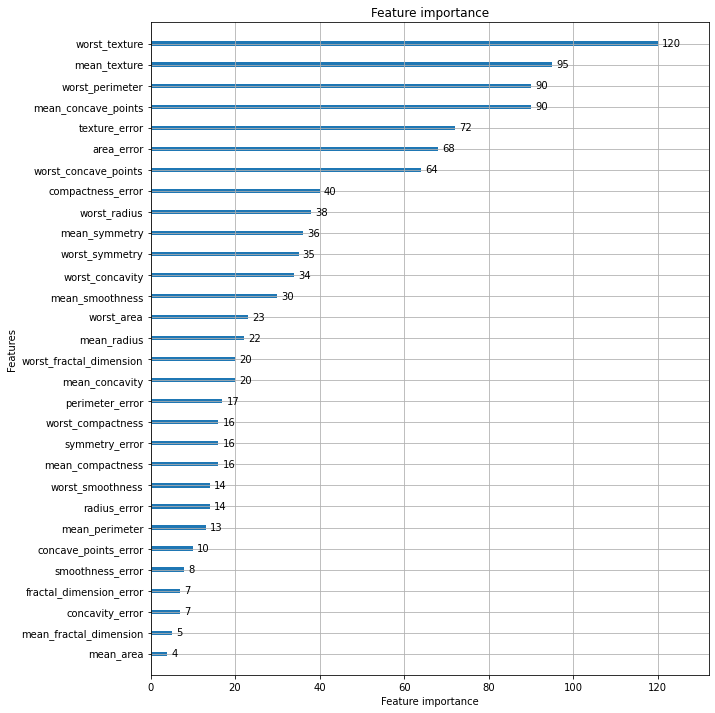

In [8]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

# < HyperOpt > : 최적의 하이퍼 파라미터 찾기

In [ ]:
- 사용 순서
a.함수 설정 b.범위 설정 c.fmin()으로 x,y값 찾기
    -> b,a,c
    
-hyperopt의 hp모듈을 사용하여 -20 - 20까지 2간격을 가지는 입력변수와
x와 -15 - 15까지 1간격으로 입력변수 y를 설정하세요.
from hyperopt import hp
search_space={'x':hp.quniform(-20,20,2),
             'y':hp.quniform(-15,15,1)}

hyperopt를 사용할 때 목적함수의 변환값들을 어떠한 클래스 객체로 저장한다.
이때 사용하는 클래스는?
    -> Trials

HyperOpt 적용하여 최적의 파라미터 값을 찾을 때,
교차 검증 정확도의 평균에 -1을 곱하여 목적함수의 입력값(fmin()의 인수)으로 넣는 이유는 무엇인가?
    -> 정확도는 높은 값일수록 좋은 성능을 지닌 지표라고 판단하는 반면,
       fmin() 함수는 값이 작을수록 더 좋은 최적화로 판단하기 때문이다.

In [ ]:
pip install hyperopt

In [2]:
# 1. 범위 설정
from hyperopt import hp

search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y',-15,15,1)}

In [3]:
# 2. 함수 설정
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

# x=0, y=-15

In [4]:
# 최적의 입력값을 유추하기
from hyperopt import fmin, tpe, Trials
trails = Trials()

In [5]:
# 3. fmin()으로 x,y값 찾기
import numpy as np

best02 = fmin(fn= objective_func, space= search_space, algo= tpe.suggest, max_evals= 5,
    trials= trails, rstate= np.random.default_rng(seed=0))

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 385.41trial/s, best loss: -224.0]


In [6]:
print(best02)  # 최적화를 위한 x,y를 찾아줌

{'x': -4.0, 'y': 12.0}


In [7]:
best03 = fmin(fn= objective_func, space= search_space, algo= tpe.suggest, max_evals= 100,  # 100번을 다시 돌렸다.
    trials= trails, rstate= np.random.default_rng(seed=0))
print(best03)

100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 172.43trial/s, best loss: -299.0]
{'x': -1.0, 'y': 15.0}


정확한 값을 바로 내진 못했지만 거의 근접한 값을 내주고 있다

In [1]:
# 속성확인
trails.results

NameError: name 'trails' is not defined

## -> 본격적으로 최적화

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X = features = dataset.data
y = labels = dataset.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=156)

from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   }

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

from hyperopt import fmin, tpe, Trials
import warnings
warnings.filterwarnings('ignore')

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best) 

100%|███████████████████████████████████████████████| 50/50 [00:05<00:00,  9.94trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


## -> 성능 평가

In [16]:
from sklearn.metrics import accuracy_score

xgb_clf = XGBClassifier(n_estimators=100, max_depth=17,
                            min_child_weight=2,
                            learning_rate=.126,
                            colsample_bytree=.54)

xgb_clf.fit(X_train, y_train)

preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

[13:28:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9473684210526315

# < SMOTE >

- Credit card fraud detection

In [3]:
import pandas as pd
card = pd.read_csv('creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
card.shape

- LogisticRegression 모델 사용

In [4]:
# 1. Time 칼럼을 삭제하기
card = card.drop(['Time'], axis = 1)

# 2. 데이터셋 분리
from sklearn.model_selection  import train_test_split
features = card.iloc[:, :-1]
labels = card.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels) 

y_train.value_counts()/len(y_train) #len(y_train)은 전체값이다.

0    0.998275
1    0.001725
Name: Class, dtype: float64

In [5]:
# 3. 모델 생성하고 fit, predict, evaluate하기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(max_iter = 1000) #반복개수를 1000번
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 
    
get_clf_eval(y_test, preds, preds_proba) #AUC 값을 내려고 preds_proba 시용함

오차 행렬
[[85282    13]
 [   62    86]]
정확도: 0.9991, 정밀도: 0.8687, 재현율: 0.5811,    F1: 0.6964, AUC:0.9745


- LGBMClassifier 모델 사용

In [6]:
from lightgbm import LGBMClassifier

lgbm_clf =LGBMClassifier(n_estimators = 1000, num_leaves= 64, n_jobs= -1, boost_from_average= False) 
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, preds_proba)

오차 행렬
[[85290     5]
 [   30   118]]
정확도: 0.9996, 정밀도: 0.9593, 재현율: 0.7973,    F1: 0.8708, AUC:0.9785


아까 91에서 117로 늘어났다.(높아졌다.)

## -> 데이터 정제(Scaling) 후 적용

In [8]:
card['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
# 표준화 하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
card['Amount'] = scaler.fit_transform(card['Amount'].values.reshape(-1,1))
card[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0


In [10]:
# 표준화 후 결과
from sklearn.model_selection  import train_test_split
features = card.iloc[:, :-1]
labels = card.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000) #반복개수를 1000번
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, preds_proba)

오차 행렬
[[85284    11]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8942, 재현율: 0.6284,    F1: 0.7381, AUC:0.9690


In [11]:
from lightgbm import LGBMClassifier

lgbm_clf =LGBMClassifier(n_estimators = 1000, num_leaves= 64, n_jobs= -1, boost_from_average= False) 
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, preds_proba)

오차 행렬
[[85292     3]
 [   32   116]]
정확도: 0.9996, 정밀도: 0.9748, 재현율: 0.7838,    F1: 0.8689, AUC:0.9804


## -> 데이터 정제(로그변환) 후 변환

In [14]:
import numpy as np
card = pd.read_csv('creditcard.csv')
card = card.drop(['Time'], axis = 1)

# 로그변환 하기
card['Amount'] = np.log1p(card['Amount'])
card[:3]  #로그를 사용하는 이유: 숫자가 너무 커서

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0


In [15]:
from sklearn.model_selection  import train_test_split
features = card.iloc[:, :-1]
labels = card.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]

print(get_clf_eval(y_test, preds, preds_proba))
print()


from lightgbm import LGBMClassifier

lgbm_clf =LGBMClassifier(n_estimators = 1000, num_leaves= 64, n_jobs= -1, boost_from_average= False) 
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:, 1]

print(get_clf_eval(y_test, preds, preds_proba))

오차 행렬
[[85276    19]
 [   49    99]]
정확도: 0.9992, 정밀도: 0.8390, 재현율: 0.6689,    F1: 0.7444, AUC:0.9779
None

오차 행렬
[[85287     8]
 [   28   120]]
정확도: 0.9996, 정밀도: 0.9375, 재현율: 0.8108,    F1: 0.8696, AUC:0.9814
None


## -> 이상치 데이터 제거 후 모델 학습 /예측 /평가

In [ ]:
# 1. 이상치 찾기
IQR = 3/4 - 1/4

3/4 + 1.5IQR
1/4 - 1.5IQR

In [16]:
card.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
# 조건에 만족하는 것을 뽑아내었다.
fraud = card[card['Class'] == 1]
fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,6.272877,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,5.484506,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,4.094345,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.968708,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.565314,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,4.368054,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,5.505332,1


In [18]:
# fraud['V14'] <- 여기서 이상치 찾아내기
pct25 = np.percentile(fraud.V14, 25)
pct75 = np.percentile(fraud.V14, 75)

IQR = pct75 - pct25

upper_out = pct75 + 1.5 * IQR
under_out = pct25 - 1.5 * IQR

cond1 = fraud['V14'] >= upper_out
cond2 = fraud['V14'] <= under_out
fraud.V14[cond1 | cond2] 

8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

In [19]:
outlier = fraud[(fraud['V14'] > upper_out) | (fraud['V14'] < under_out)]
outlier.index

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [20]:
card.drop(outlier.index, axis=0, inplace=True)
card[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0


In [21]:
from sklearn.model_selection  import train_test_split
features = card.iloc[:, :-1]
labels = card.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]

print(get_clf_eval(y_test, preds, preds_proba))
print()


from lightgbm import LGBMClassifier

lgbm_clf =LGBMClassifier(n_estimators = 1000, num_leaves= 64, n_jobs= -1, boost_from_average= False) 
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:, 1]

print(get_clf_eval(y_test, preds, preds_proba))

오차 행렬
[[85283    12]
 [   60    86]]
정확도: 0.9992, 정밀도: 0.8776, 재현율: 0.5890,    F1: 0.7049, AUC:0.9814
None

오차 행렬
[[85289     6]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9528, 재현율: 0.8288,    F1: 0.8864, AUC:0.9819
None


## -> SMOTE로 오버샘플링

In [22]:
from imblearn.over_sampling import SMOTE

# 데이터셋 분리
features = card.iloc[:, :-1]
labels = card.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

# SMOTE 적용
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train) #y_train을 oversampling해주었다.

# 모델 생성1
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]

print(get_clf_eval(y_test, preds, preds_proba))
print()

#모델 생성2
lgbm_clf =LGBMClassifier(n_estimators = 1000, num_leaves= 64, n_jobs= -1, boost_from_average= False) 
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:, 1]

print(get_clf_eval(y_test, preds, preds_proba))

오차 행렬
[[83349  1946]
 [   17   129]]
정확도: 0.9770, 정밀도: 0.0622, 재현율: 0.8836,    F1: 0.1162, AUC:0.9724
None

오차 행렬
[[85280    15]
 [   34   112]]
정확도: 0.9994, 정밀도: 0.8819, 재현율: 0.7671,    F1: 0.8205, AUC:0.9670
None


In [ ]:
false가 많아졌는데 이유는 oversampling을 했기 때문이다.